In [ ]:
import pandas as pd

df = pd.read_excel("online_retail_II.xlsx")
print("Dataset info:")
print(df.info())
df.head(5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df = df.dropna(subset=['Customer ID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

df = df.drop_duplicates()

print("\nCleaned dataset info:")
print(df.info())

cleaned_file_path = "cleaned_online_retail.xlsx"
df.to_excel(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


<ipython-input-2-5e068ce3718e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])



Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 400916 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400916 non-null  object        
 1   StockCode    400916 non-null  object        
 2   Description  400916 non-null  object        
 3   Quantity     400916 non-null  int64         
 4   InvoiceDate  400916 non-null  datetime64[ns]
 5   Price        400916 non-null  float64       
 6   Customer ID  400916 non-null  float64       
 7   Country      400916 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.5+ MB
None

Cleaned dataset saved to: cleaned_online_retail.xlsx


In [ ]:
df['Customer ID'] = df['Customer ID'].astype(int)

df['Frequency'] = df.groupby('Customer ID')['Customer ID'].transform('count')
df['MonetaryValue'] = df.groupby('Customer ID')['Quantity'].transform('sum') * df['Price']

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_date = df['InvoiceDate'].max()
df['Recency'] = df.groupby('Customer ID')['InvoiceDate'].transform(lambda x: (max_date - x.max()).days)

clv_df = df.groupby('Customer ID').agg({
    'Recency': 'min',
    'Frequency': 'max',
    'Quantity': 'sum',
    'MonetaryValue': 'sum'
}).reset_index()

clv_df['CLV'] = clv_df['Frequency'] * clv_df['MonetaryValue']

processed_file_path = "clv_features.xlsx"
clv_df.to_excel(processed_file_path, index=False)
print(f"\nProcessed dataset saved to: {processed_file_path}")

clv_df.head(10)


Processed dataset saved to: clv_features.xlsx


,Customer ID,Recency,Frequency,Quantity,MonetaryValue,CLV
0,12346,164,33,70,14445.20,4.766916e+05
1,12347,2,71,828,134922.60,9.579505e+06
2,12348,73,20,373,5367.47,1.073494e+05
3,12349,42,102,993,869212.62,8.865969e+07
4,12351,10,21,261,12909.06,2.710903e+05
5,12352,10,18,188,10264.80,1.847664e+05
6,12353,43,20,192,7445.76,1.489152e+05
7,12355,202,22,303,15992.34,3.518315e+05
8,12356,15,83,1825,473459.75,3.929716e+07
9,12357,23,165,3879,5413687.56,8.932584e+08


from matplotlib import pyplot as plt
_df_0['Customer ID'].plot(kind='hist', bins=20, title='Customer ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Customer ID', y='Recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Frequency', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Quantity', y='MonetaryValue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['Recency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('Recency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['Frequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('Frequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['MonetaryValue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('MonetaryValue')

from matplotlib import pyplot as plt
_df_12['Customer ID'].plot(kind='line', figsize=(8, 4), title='Customer ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

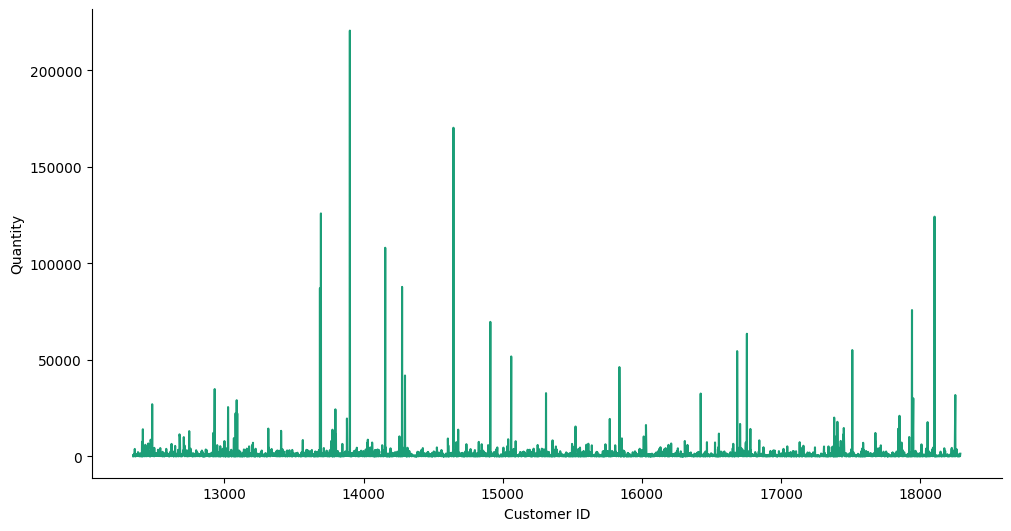

In [ ]:
# @title Customer ID vs Quantity

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['Quantity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = clv_df.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('Quantity')

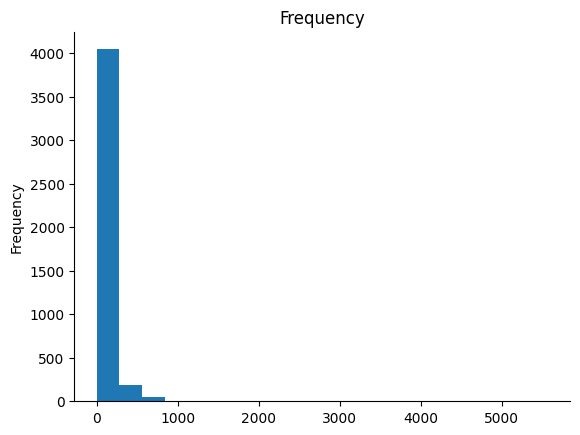

In [ ]:
# @title Frequency

from matplotlib import pyplot as plt
clv_df['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

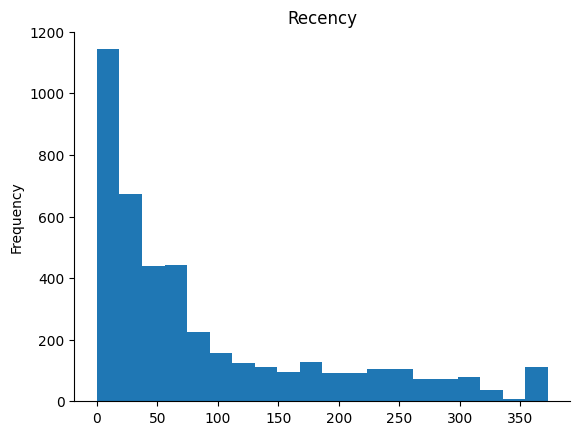

In [ ]:
# @title Recency

from matplotlib import pyplot as plt
clv_df['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

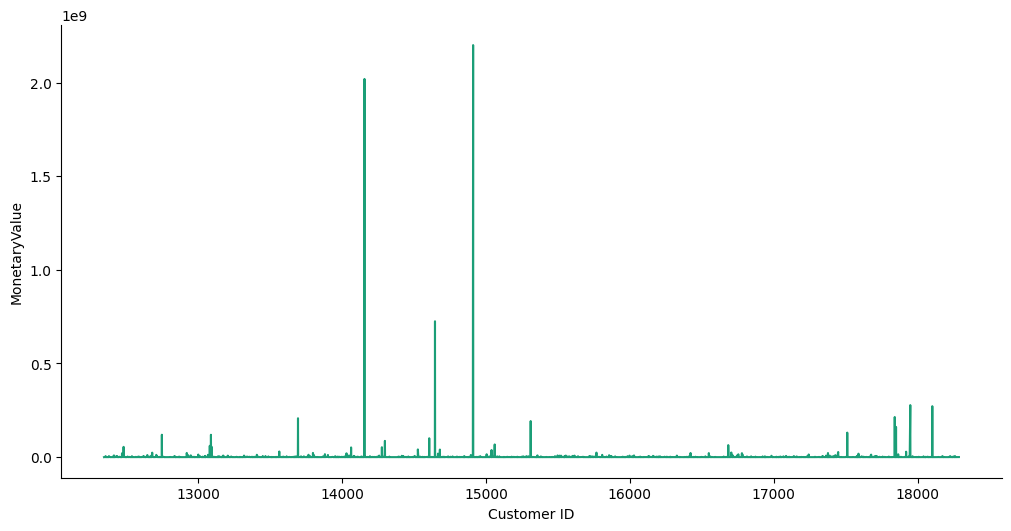

In [ ]:
# @title Customer ID vs MonetaryValue

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Customer ID']
  ys = series['MonetaryValue']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = clv_df.sort_values('Customer ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Customer ID')
_ = plt.ylabel('MonetaryValue')

In [ ]:
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu118.html
!pip install torch-geometric
!pip install networkx scikit-learn pandas numpy xgboost gradio

Looking in links: https://download.pytorch.org/whl/cu118.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitli

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, BatchNorm, global_mean_pool,LayerNorm
from torch_geometric.data import Data, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import kneighbors_graph
import pandas as pd
from torch_geometric.loader import DataLoader
import numpy as np
df = pd.read_excel("clv_features.xlsx")

scaler = MinMaxScaler()
features = df[['Recency', 'Frequency', 'Quantity', 'MonetaryValue']].values
features = scaler.fit_transform(features)
labels = np.log1p(df['CLV'].values)

In [ ]:
print(df.head(10))
print(pd.DataFrame(features).head(10))

   Customer ID  Recency  Frequency  Quantity  MonetaryValue           CLV
0        12346      164         33        70       14445.20  4.766916e+05
1        12347        2         71       828      134922.60  9.579505e+06
2        12348       73         20       373        5367.47  1.073494e+05
3        12349       42        102       993      869212.62  8.865969e+07
4        12351       10         21       261       12909.06  2.710903e+05
5        12352       10         18       188       10264.80  1.847664e+05
6        12353       43         20       192        7445.76  1.489152e+05
7        12355      202         22       303       15992.34  3.518315e+05
8        12356       15         83      1825      473459.75  3.929716e+07
9        12357       23        165      3879     5413687.56  8.932584e+08
          0         1         2         3
0  0.439678  0.005748  0.000313  0.000007
1  0.005362  0.012574  0.003749  0.000061
2  0.195710  0.003413  0.001686  0.000002
3  0.112601  0.018

In [ ]:
X = torch.tensor(features, dtype=torch.float)
y = torch.tensor(labels, dtype=torch.float).view(-1, 1)

In [ ]:
num_customers = len(df)

In [ ]:
knn_graph = kneighbors_graph(features, n_neighbors=15, mode='connectivity', include_self=False)
edge_index = torch.tensor(np.array(knn_graph.nonzero()), dtype=torch.long)

In [ ]:
graph_data = Data(x=X, edge_index=edge_index, y=y)

In [ ]:
class CLV_GNN(torch.nn.Module):
    def __init__(self, in_features, hidden_dim, out_features):
        super(CLV_GNN, self).__init__()
        self.conv1 = GCNConv(in_features, hidden_dim)
        self.bn1 = BatchNorm(hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim // 2)
        self.bn2 = BatchNorm(hidden_dim // 2)
        self.conv3 = GCNConv(hidden_dim // 2, out_features)
        self.dropout = torch.nn.Dropout(0.1)
        self.fc = torch.nn.Linear(out_features, 1)

    def forward(self, data):
        if isinstance(data, torch.Tensor):
            edge_index = torch.tensor([[0], [0]], dtype=torch.long, device=data.device)
            data = Data(x=data, edge_index=edge_index)

        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)

        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout(x)

        x = self.conv3(x, edge_index)
        x = F.relu(x)

        x = self.fc(x)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CLV_GNN(in_features=4, hidden_dim=64, out_features=32).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.005, weight_decay=1e-4)
loss_fn = torch.nn.HuberLoss(delta=1.0)

graph_data = graph_data.to(device)
loader = DataLoader([graph_data], batch_size=1, shuffle=True)

In [ ]:
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    for batch in loader:
        batch = batch.to(device)
        output = model(batch)
        loss = loss_fn(output.view(-1), batch.y.view(-1))
        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 14.345848083496094
Epoch 100, Loss: 1.1119316816329956
Epoch 200, Loss: 0.9937902688980103
Epoch 300, Loss: 0.9526329040527344
Epoch 400, Loss: 0.8623489737510681
Epoch 500, Loss: 0.7314639091491699
Epoch 600, Loss: 0.6106660962104797
Epoch 700, Loss: 0.5749626159667969
Epoch 800, Loss: 0.5340225100517273
Epoch 900, Loss: 0.5080018043518066
Epoch 1000, Loss: 0.49680036306381226
Epoch 1100, Loss: 0.49882301688194275
Epoch 1200, Loss: 0.48358869552612305
Epoch 1300, Loss: 0.4663936197757721
Epoch 1400, Loss: 0.4563663899898529
Epoch 1500, Loss: 0.45600712299346924
Epoch 1600, Loss: 0.45760372281074524
Epoch 1700, Loss: 0.45126014947891235
Epoch 1800, Loss: 0.448488712310791
Epoch 1900, Loss: 0.42918822169303894
Epoch 2000, Loss: 0.4187099039554596
Epoch 2100, Loss: 0.42339691519737244
Epoch 2200, Loss: 0.4199950098991394
Epoch 2300, Loss: 0.4149762690067291
Epoch 2400, Loss: 0.4192774295806885
Epoch 2500, Loss: 0.41048771142959595
Epoch 2600, Loss: 0.4120686948299408
Epoch

In [ ]:
model.eval()
with torch.no_grad():
    predicted_clv = model(graph_data).detach().cpu().numpy()
    actual_clv = df['CLV'].values

print(f"Predicted Shape: {predicted_clv.shape}, Actual Shape: {actual_clv.shape}")


Predicted Shape: (4312, 1), Actual Shape: (4312,)


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(actual_clv, np.expm1(predicted_clv))
print(f"Improved R² Score: {r2:.4f}")

Improved R² Score: 0.9310


In [ ]:
import gradio as gr
import numpy as np
import torch
from torch_geometric.data import Data

def predict_clv(recency, frequency, quantity, monetary_value):
    input_features = np.array([[recency, frequency, quantity, monetary_value]])
    input_features = scaler.transform(input_features)
    input_tensor = torch.tensor(input_features, dtype=torch.float).to(device)
    edge_index = torch.tensor([[0], [0]], dtype=torch.long).to(device)
    input_graph = Data(x=input_tensor, edge_index=edge_index)
    model.eval()
    with torch.no_grad():
        predicted_clv = model(input_graph).cpu().numpy().flatten()[0]
    return round(np.expm1(predicted_clv), 2)

iface = gr.Interface(
    fn=predict_clv,
    inputs=[
        gr.Number(label="Recency (days since last purchase)"),
        gr.Number(label="Frequency (number of purchases)"),
        gr.Number(label="Quantity purchased"),
        gr.Number(label="Total monetary value of purchases")
    ],
    outputs=gr.Number(label="Predicted CLV"),
    title="Customer Lifetime Value Prediction",
    description="Enter customer details to predict their CLV using a GNN"
)

if __name__ == "__main__":
    iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d1efdca33b4e63d655.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
